In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [121]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [122]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [123]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [124]:
data.shape

(8124, 23)

In [125]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [126]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [127]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:>

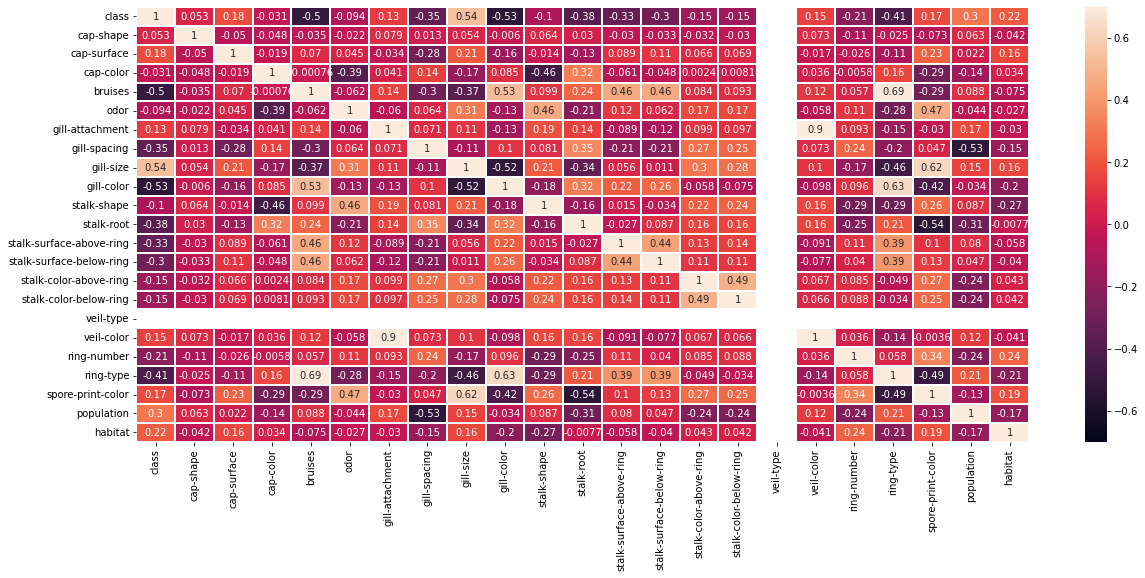

In [128]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.7,vmax=0.7,annot=True,linewidth=0.2)

In [129]:
x = data.drop(['class'], axis=1)
y = data['class']


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Decision Tree Classification

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [133]:
y_pred = dt.predict(x_test)

In [134]:
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))

Test Accuracy: 100.0%


Confusion Matrix for Decision Tree Classifier

In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

# Logistic Regression Classification

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [138]:
y_pred = lr.predict(x_test)

In [139]:
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 95.08%


Confusion Matrix for Logistic Regression Classifier

In [140]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9507631708517972

# KNN Classification

In [141]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = i

In [142]:
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [143]:
y_pred = knn.predict(x_test)

In [144]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9960610536681438

# Naive Bayes Classification Bernoullian

In [145]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [146]:
print("Test Accuracy: {}%".format(round(bnb.score(x_test, y_test)*100, 2)))

Test Accuracy: 84.44%


Confusion Matrix for Naive Bayes Classifier

In [147]:
y_pred = bnb.predict(x_test)

In [148]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.844411619891679

# Naive Bayes Classification Gaussian

In [149]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [150]:
y_pred=gnb.predict(x_test)

In [151]:
print("Test Accuracy: {}%".format(round(gnb.score(x_test, y_test)*100, 2)))

Test Accuracy: 92.66%


Confusion Matrix for Naive Bayes Classifier

In [152]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9266371245691778

conclusion : Decision Tree Classification is the best method